In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

In [83]:
def get_label_img(IMAGE_DATASET_PATH, LABEL_DATASET_PATH, index1, index2, index3):
    ''' return image with corresponding label'''
    # retrieving level 2
    n = sorted(os.listdir(LABEL_DATASET_PATH))[index1]
    level_1 = os.path.join(LABEL_DATASET_PATH, n)
    m = sorted(os.listdir(level_1))[index2]
    level_2 = os.path.join(level_1, m)
    o = sorted(os.listdir(level_2))[index3] 
    level_3 = os.path.join(level_2, o)
    
    with open(level_3) as f:
        label = f.readline().strip()
    
    # retrieving level 3
    n_i = sorted(os.listdir(IMAGE_DATASET_PATH))[index1]
    level_1_i = os.path.join(IMAGE_DATASET_PATH, n_i)
    m_i = sorted(os.listdir(level_1_i))[index2]
    level_2_i = os.path.join(level_1_i, m_i)
    o_i = sorted(os.listdir(level_2_i))[index3] 
    level_3_i = os.path.join(level_2_i, o_i)
    
    #reading image
    img = plt.imread(level_3_i)
    return img, label
    

In [84]:
LABEL_DATASET_PATH = "/kaggle/input/emotionpain/Frame_Labels/Frame_Labels/PSPI"
IMAGE_DATASET_PATH = "/kaggle/input/emotionpain/Images/Images"
image, label = get_label_img(IMAGE_DATASET_PATH, LABEL_DATASET_PATH , 0, 0, 0)
image.shape

(240, 320, 3)

### display image

In [ ]:
def show_img_label(index1, index2, index3):
    LABEL_DATASET_PATH = "/kaggle/input/emotionpain/Frame_Labels/Frame_Labels/PSPI"
    IMAGE_DATASET_PATH = "/kaggle/input/emotionpain/Images/Images"
    image, label = get_label_img(IMAGE_DATASET_PATH, LABEL_DATASET_PATH , index1, index2, index3)
    plt.imshow(image)
    plt.title("label: "+ label)
    plt.show()

In [ ]:
show_img_label(1, 0, 52)

In [ ]:
def multi_image_plot(image_list, dim = (3,3), figsize=(10, 10), title="", sharey=False, sharex=True, tight_layout=False, cmap='gray'):
    fig, axes = plt.subplots(dim[0], dim[1], figsize=figsize, sharey=sharey, sharex=sharex)
    fig.suptitle(title, fontsize=16)
    
    if tight_layout:
        fig.tight_layout()
    cursor = 0
    for i in range(0,dim[0]):
        for j in range(0,dim[1]):
            if cursor >= len(image_list):
                break
            axes[i][j].imshow(image_list[cursor][0], cmap=cmap)
            axes[i][j].axis('off')
            axes[i][j].set_title(f"label: {image_list[cursor][1]}")

            cursor += 1
    plt.show()

In [ ]:
def show_img_grid(index_3, index_1=1, index_2=0):
    LABEL_DATASET_PATH = "/kaggle/input/emotionpain/Frame_Labels/Frame_Labels/PSPI"
    IMAGE_DATASET_PATH = "/kaggle/input/emotionpain/Images/Images"
    image_bucket = []
    for i in range(index_3, index_3+9):
        img, label = get_label_img(IMAGE_DATASET_PATH,
                                   LABEL_DATASET_PATH ,
                                   index_1, index_2, i)
        image_bucket.append((img, label))
    multi_image_plot(image_bucket)

In [ ]:
show_img_grid(50, 1, 0)

In [ ]:
show_img_grid(90, 3, 3)

In [29]:
def get_large_label_indices(lower_bound = 3):
    LABEL_DATASET_PATH = "/kaggle/input/emotionpain/Frame_Labels/Frame_Labels/PSPI"
    IMAGE_DATASET_PATH = "/kaggle/input/emotionpain/Images/Images"
    indices_bucket = []
    for l1, level_1 in tqdm(enumerate(sorted(os.listdir(LABEL_DATASET_PATH)))):
        level_1_full_path = os.path.join(LABEL_DATASET_PATH, level_1)
        for l2, level_2 in enumerate(sorted(os.listdir(level_1_full_path))):
            level_2_full_path = os.path.join(level_1_full_path, level_2)
            for l3, level_3 in enumerate(sorted(os.listdir(level_2_full_path))):
                level_3_full_path = os.path.join(level_2_full_path, level_3)
                with open(level_3_full_path) as f:
                    label = float(f.readline().strip())
                    if  label > lower_bound:
                         indices_bucket.append(((l1, l2, l3), label))
    
    return indices_bucket
                        
                    

In [30]:
indices_bucket = get_large_label_indices()

25it [01:35,  3.83s/it]


In [31]:
np.unique([x for _, x in indices_bucket], return_counts= True)

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]),
 array([802, 242, 270,  53,  79,  32,  67,  76,  48,  22,   1,   5]))

In [ ]:
# 0 - 2, 3-5, 5- above
# indices_bucket[1500:1510]

In [ ]:
# show_img_grid(85, 0, 5)

In [ ]:
# show_img_grid(70, 0, 5)

In [ ]:
# show_img_grid(345, 24, 6)

In [ ]:
# show_img_grid(163, 23, 1)

In [3]:
import cv2
import numpy as np
import glob
def gen_video(index_1, index_2, index_3_range, name):
    LABEL_DATASET_PATH = "/kaggle/input/emotionpain/Frame_Labels/Frame_Labels/PSPI"
    IMAGE_DATASET_PATH = "/kaggle/input/emotionpain/Images/Images"
    frameSize = (500, 500)
    out = cv2.VideoWriter(name, cv2.VideoWriter_fourcc('M','J','P','G'),
                          10, frameSize)

    n_i = sorted(os.listdir(IMAGE_DATASET_PATH))[index_1]
    level_1_i = os.path.join(IMAGE_DATASET_PATH, n_i)
    m_i = sorted(os.listdir(level_1_i))[index_2]
    level_2_i = os.path.join(level_1_i, m_i)
#     o_i = sorted(os.listdir(level_2_i))
    for img_path in sorted(glob.glob(f"{level_2_i}/*"))[index_3_range[0]:index_3_range[1]]:
        img = cv2.imread(img_path)
        resized = cv2.resize(img, (500,500), interpolation = cv2.INTER_AREA)
        out.write(resized)
    out.release()

In [ ]:
# gen_video(0, 5, (0, 300), 'output_video3.avi')

# Preparing Training Dataset

- crop faces, labels

In [4]:
from random import shuffle
from tqdm import tqdm
import cv2
from pickle import dump, load
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
import pickle as pk
from tensorflow.keras import applications
import os
import numpy as np

In [39]:
# def generate_dataset(Label_Dir, TRAIN_DIR, IMG_SIZE):
#     harrcascade_face_xml = "/kaggle/input/haarcascades/haarcascade_frontalface_default.xml"
#     face_cascade = cv2.CascadeClassifier(harrcascade_face_xml)
#     training_data = []
#     label_data=[]

#     c0 = c1 = res =0
#     #reading label only 
#     for folder in tqdm(sorted(os.listdir(Label_Dir))):
#         c0=0
#         for inner_folder in sorted(os.listdir((Label_Dir+'/'+folder))):
#             path = os.path.join(Label_Dir,folder+'/'+ inner_folder)
#             for file_name in sorted(os.listdir(path)):
                
#                 file=os.path.join(path+'/'+file_name)
#                 with open(file) as f:
#                     label = float(f.readline().strip())
#                     if (label < 2 and c0<340):
#                         label_data.append((file_name, 0))
#                         res+=1
#                         c0+=1
#                     if(label >= 2):
#                         label_data.append((file_name, 1))
#                         c1+=1
#                     f.close()
    
#     label_data.append(('eof', -1))
#     print(str(res) + ' ' + str(c1))
#     #reading images and it's labels
#     c = c0 = c1 = res = 0
#     print(len(label_data))
    
#     for folder in sorted(os.listdir(TRAIN_DIR)):
#         c0=0
#         for inner_folder in sorted(os.listdir((TRAIN_DIR+'/'+folder))):
#             path = os.path.join(TRAIN_DIR,folder+'/'+ inner_folder)
            
#             for img_name in tqdm(sorted(os.listdir(path))):

#                 img=os.path.join(path+'/'+img_name)
                
#                 _label = label_data[c][0].split('.')[0].strip().lower()
#                 _img = img_name.split('.')[0]+"_facs".strip().lower()
                
#                 if _label != _img: #checker
#                     x = {"image": _img, "label": _label, "index": c}
#                     print(x)
#                     c += 1
#                     continue
                    
#                 img_data = cv2.imread(img,cv2.IMREAD_COLOR)#cv2.IMREAD_COLOR
#                 img_data_gray = cv2.cvtColor(img_data,cv2.COLOR_RGB2GRAY)
#                 faces = face_cascade.detectMultiScale(img_data_gray, 1.1, 4)
                
#                 if not len(faces):
#                     c += 1
#                     print("no face detected..")
#                     continue
                    
#                 x, y, w, h = faces[0]
#                 face_cropped = img_data[y: y+h, x: x+w]
#                 img_data = cv2.resize(face_cropped, (IMG_SIZE, IMG_SIZE))

#                 if (label_data[c][1]==-1):break
#                 if (label_data[c][1] < 2 and c0<340):
#                     training_data.append([np.array(img_data), label_data[c][1]])
#                     c0+=1
#                     res+=1
#                     c+=1
#                 if (label_data[c][1] >= 2):
#                     training_data.append([np.array(img_data), label_data[c][1]])
#                     c+=1
#                     c1+=1
#                 if c % 100 == 0:
#                     print("saving dataset...")
#                     dump(training_data, open('/kaggle/working/training_data_rgb_checkpoint.pkl', 'wb'))

#             #print(str(res) + ' ' + str(c1))      

#     print(str(res) + ' ' + str(c1))           

#     shuffle(training_data) 
#     dump(training_data, open('/kaggle/working/training_data_rgb.pkl', 'wb'))
#     return training_data

In [5]:
def generate_dataset(Label_Dir, TRAIN_DIR, IMG_SIZE, n_skip=3):
    harrcascade_face_xml = "/kaggle/input/haarcascades/haarcascade_frontalface_default.xml"
    face_cascade = cv2.CascadeClassifier(harrcascade_face_xml)
    training_data = []
    label_data=[]

    #reading label only 
    for folder in tqdm(sorted(os.listdir(Label_Dir))):
        for inner_folder in sorted(os.listdir((Label_Dir+'/'+folder))):
            path = os.path.join(Label_Dir,folder+'/'+ inner_folder)
            for file_name in sorted(os.listdir(path)):
                
                file=os.path.join(path+'/'+file_name)
                with open(file) as f:
                    label = float(f.readline().strip())
                    if label < 2:
                        label_data.append((file_name, 0))
                    if label >= 2:
                        label_data.append((file_name, 1))
                    f.close()
    
    label_data.append(('eof', -1))
    #reading images and it's labels
    c = 0
    print(len(label_data))
    
    for folder in sorted(os.listdir(TRAIN_DIR)):
        for inner_folder in sorted(os.listdir((TRAIN_DIR+'/'+folder))):
            path = os.path.join(TRAIN_DIR,folder+'/'+ inner_folder)
            
            for img_name in tqdm(sorted(os.listdir(path))):
                
                if c%n_skip != 0:
                    c += 1
                    continue
                
                img=os.path.join(path+'/'+img_name)
                
                _label = label_data[c][0].split('.')[0].strip().lower()
                _img = img_name.split('.')[0]+"_facs".strip().lower()
                
                if _label != _img: #checker
                    x = {"image": _img, "label": _label, "index": c}
                    print(x)
                    c += 1
                    continue
                    
                img_data = cv2.imread(img,cv2.IMREAD_COLOR)#cv2.IMREAD_COLOR
                img_data_gray = cv2.cvtColor(img_data,cv2.COLOR_RGB2GRAY)
                faces = face_cascade.detectMultiScale(img_data_gray, 1.1, 4)
                
                if not len(faces):
                    c += 1
                    print("no face detected..")
                    continue
                    
                x, y, w, h = faces[0]
                face_cropped = img_data[y: y+h, x: x+w]
                img_data = cv2.resize(face_cropped, (IMG_SIZE, IMG_SIZE))

                if (label_data[c][1]==-1):break
                
                elif (label_data[c][1] < 2):
                    training_data.append([np.array(img_data), label_data[c][1]])
                    c+=1
                else:
                    training_data.append([np.array(img_data), label_data[c][1]])
                    c+=1

                if c % 100 == 0:
                    print("saving dataset...")
                    dump(training_data, open('/kaggle/working/training_data_rgb_checkpoint.pkl', 'wb'))
            #print(str(res) + ' ' + str(c1))      
    shuffle(training_data) 
    dump(training_data, open('/kaggle/working/training_data_rgb.pkl', 'wb'))
    return training_data

In [26]:

LABEL_DATASET_PATH = "/kaggle/input/emotionpain/Frame_Labels/Frame_Labels/PSPI"
IMAGE_DATASET_PATH = "/kaggle/input/emotionpain/Images/Images"
training_data = generate_dataset(LABEL_DATASET_PATH, IMAGE_DATASET_PATH  , 128)


SyntaxError: invalid syntax (2701505189.py, line 1)

In [25]:
len(training_data)
del training_data

# Testing dlib face detector

In [5]:
import dlib

In [2]:
# !wget "http://dlib.net/files/mmod_human_face_detector.dat.bz2"

--2022-12-12 07:47:23--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  --.-KB/s    in 0.1s    

2022-12-12 07:47:23 (4.43 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [11]:
detector = dlib.cnn_face_detection_model_v1("/kaggle/input/models/mmod_human_face_detector.dat")

In [92]:
!wget "https://www.shutterstock.com/image-photo/surreal-image-african-elephant-wearing-260nw-1365289022.jpg"

--2022-12-12 08:40:56--  https://www.shutterstock.com/image-photo/surreal-image-african-elephant-wearing-260nw-1365289022.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 13.249.120.45, 13.249.120.92, 13.249.120.33, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|13.249.120.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22966 (22K) [image/jpeg]
Saving to: ‘surreal-image-african-elephant-wearing-260nw-1365289022.jpg’

surreal-image-afric 100%[===================>]  22.43K  --.-KB/s    in 0.002s  

2022-12-12 08:40:56 (12.7 MB/s) - ‘surreal-image-african-elephant-wearing-260nw-1365289022.jpg’ saved [22966/22966]



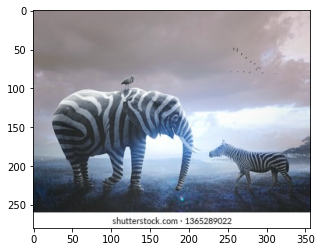

In [93]:
img_data = cv2.imread("/kaggle/working/surreal-image-african-elephant-wearing-260nw-1365289022.jpg")#cv2.IMREAD_COLOR
# rgb_img = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
rgb_img = img_data
plt.imshow(rgb_img)

In [94]:
face = detector(rgb_img, 0)[0]

IndexError: 

In [77]:

face.rect.left(), face.rect.right(), face.rect.top(), face.rect.bottom()

(210, 407, 140, 337)

In [78]:
img.shape

(487, 626, 3)

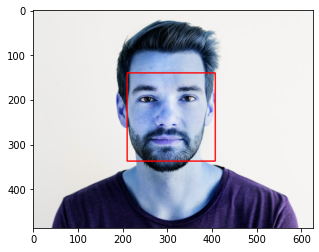

In [79]:
img = cv2.rectangle(rgb_img.copy(), (face.rect.left(), face.rect.top()), (face.rect.right(), face.rect.bottom()), (255, 0, 0), 2)
plt.imshow(img)

# Prepare dataset
- add image into different folders

In [6]:
# emotionpain dataset
LABEL_DATASET_PATH = "/kaggle/input/emotionpain/Frame_Labels/Frame_Labels/PSPI"
IMAGE_DATASET_PATH = "/kaggle/input/emotionpain/Images/Images"
label_data = []

for folder in tqdm(sorted(os.listdir(LABEL_DATASET_PATH))):
        for inner_folder in sorted(os.listdir((LABEL_DATASET_PATH+'/'+folder))):
            path = os.path.join(LABEL_DATASET_PATH,folder+'/'+ inner_folder)
            for file_name in sorted(os.listdir(path)):
                
                file=os.path.join(path+'/'+file_name)
                with open(file) as f:
                    label = float(f.readline().strip())
                    if label <= 2:
                        label_data.append((file_name, 0))
                    elif label > 2 and label <= 5:
                        label_data.append((file_name, 1))
                    if label > 5:
                        label_data.append((file_name, 2))
                    f.close()
    
label_data.append(('eof', -1))

100%|██████████| 25/25 [03:11<00:00,  7.66s/it]


In [2]:

n_skip = 2
ROOT_DIR = "dataset/"
c = 0
# harrcascade_face_xml = "/kaggle/input/haarcascades/haarcascade_frontalface_default.xml"
# face_cascade = cv2.CascadeClassifier(harrcascade_face_xml)
face_detector = dlib.cnn_face_detection_model_v1("/kaggle/input/models/mmod_human_face_detector.dat")

IMG_SIZE = 128

if not os.path.exists(ROOT_DIR):
    os.makedirs(ROOT_DIR)
    
for folder in sorted(os.listdir(IMAGE_DATASET_PATH)):
        for inner_folder in sorted(os.listdir((IMAGE_DATASET_PATH+'/'+folder))):
            path = os.path.join(IMAGE_DATASET_PATH,folder+'/'+ inner_folder)
            
            for img_name in tqdm(sorted(os.listdir(path))):
                
                if c%n_skip != 0 and n_skip != 0:
                    c += 1
                    continue
                
                img=os.path.join(path+'/'+img_name)
                
                _label = label_data[c][0].split('.')[0].strip().lower()
                _img = img_name.split('.')[0]+"_facs".strip().lower()
                
                if _label != _img: #checker
                    x = {"image": _img, "label": _label, "index": c}
                    print(x)
                    c += 1
                    continue
                    
                img_data = cv2.imread(img,cv2.IMREAD_COLOR)#cv2.IMREAD_COLOR
#                 rgb_img = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
                faces = face_detector(img_data, 0)
                
                if not len(faces):
                    c += 1
                    print("no face detected..")
                    continue
                    
                face = faces[0]
                x = face.rect.left()
                y = face.rect.top()
                x1 = face.rect.right()
                y1 = face.rect.bottom()
                
                try:
                    face_cropped = img_data[y: y1, x: x1]
                    img_data = cv2.resize(face_cropped, (IMG_SIZE, IMG_SIZE))
                
                except:
                    c += 1
                    continue
                
                if (label_data[c][1]==-1):
                    break
                # creating a directory
                abs_path = os.path.join(ROOT_DIR, str(label_data[c][1]))
                if not os.path.exists(abs_path):
                    os.makedirs(abs_path)
                # save image into their corresponding label(folder)
                cv2.imwrite(os.path.join(abs_path, "EP_"+str(c)+".jpg"), img_data)
                c+=1

SyntaxError: invalid syntax (3372161644.py, line 1)

In [9]:
# download prepared dataset

!zip -r dataset_128_rgb_v1.zip /kaggle/working/dataset -q

SyntaxError: invalid syntax (2448143666.py, line 2)

# Preparing other dataset source and merging

In [10]:
ROOT_DIR = 'dataset/'
if not os.path.exists(ROOT_DIR):
    os.makedirs(ROOT_DIR)

In [11]:
IMG_DIR_HAPPY = "/kaggle/input/facial-expression-dataset/train/train/happy"
DESTINATION_HAPPY = "/kaggle/working/dataset/0"
IMG_SIZE = 128

if not os.path.exists(DESTINATION_HAPPY):
    os.makedirs(DESTINATION_HAPPY)

c = 0
for img_name in tqdm(sorted(os.listdir(IMG_DIR_HAPPY))):
    abs_path = os.path.join(IMG_DIR_HAPPY, img_name)
    img = cv2.imread(abs_path)
    # resizing image to 200
    try:
        img_data = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    except:
        print("error while resizing...")
        continue

    # saving data into dataset folder
    cv2.imwrite(os.path.join(DESTINATION_HAPPY, "FED_h_"+str(c)+".jpg"), img_data)
    
    c += 1

100%|██████████| 7215/7215 [00:28<00:00, 254.10it/s]


In [12]:
IMG_DIR_NEUTRAL = "/kaggle/input/facial-expression-dataset/train/train/neutral"
DESTINATION_NEUTRAL = "/kaggle/working/dataset/0"

if not os.path.exists(DESTINATION_NEUTRAL):
    os.makedirs(DESTINATION_NEUTRAL)

c = 0
for img_name in tqdm(sorted(os.listdir(IMG_DIR_NEUTRAL))):
    abs_path = os.path.join(IMG_DIR_NEUTRAL, img_name)
    img = cv2.imread(abs_path)
    # resizing image to 200
    try:
        img_data = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    except:
        print("error while resizing...")
        continue
    # saving data into dataset folder
    cv2.imwrite(os.path.join(DESTINATION_NEUTRAL, "FED_n_"+str(c)+".jpg"), img_data)
    c += 1

100%|██████████| 4965/4965 [00:19<00:00, 257.17it/s]


In [13]:
IMG_DIR_SURPRISED = "/kaggle/input/facial-expression-dataset/train/train/surprise"
DESTINATION_SURPRISED = "/kaggle/working/dataset/0"

if not os.path.exists(DESTINATION_SURPRISED):
    os.makedirs(DESTINATION_SURPRISED)

c = 0
for img_name in tqdm(sorted(os.listdir(IMG_DIR_SURPRISED))):
    abs_path = os.path.join(IMG_DIR_SURPRISED, img_name)
    img = cv2.imread(abs_path)
    # resizing image to 200
    try:
        img_data = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    except:
        print("error while resizing...")
        continue
    # saving data into dataset folder
    cv2.imwrite(os.path.join(DESTINATION_SURPRISED, "FED_s_"+str(c)+".jpg"), img_data)
    c += 1

100%|██████████| 3171/3171 [00:13<00:00, 231.03it/s]


In [14]:
!zip -r dataset_128_v2.zip /kaggle/working/dataset -q

# Dataset preparation: video to dataset

In [ ]:
from tensorflow import keras
import cv2
import numpy as np
import dlib

# visualizing training dataset

In [48]:
# loading saved training data
dataset_path = "/kaggle/input/pain-dataset/training_data_rgb.pkl"
if (os.path.exists(dataset_path)):
        training_data = load(open(dataset_path, 'rb'))

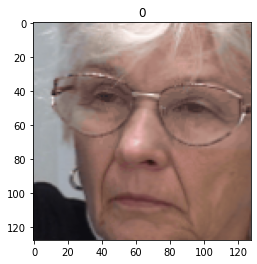

In [11]:
img, label = training_data[70]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(label)
plt.show()

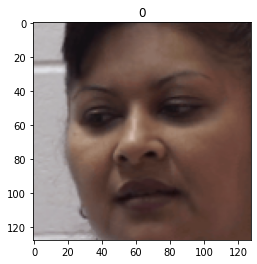

In [12]:
img, label = training_data[3000]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(label)
plt.show()

In [ ]:
img.shape

# Model building

In [13]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras import applications
from tensorflow import keras

In [14]:
def Model_vgg(ImgSize, fine_tune=0):
    pretrained_model = applications.vgg16.VGG16(weights='imagenet', include_top=False,input_shape=ImgSize)
    model = Sequential()
    
    for layer in pretrained_model.layers:
        model.add(layer)
    
    # freezing vgg16 layers
    if fine_tune > 0:
        for layer in model.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in model.layers:
            layer.trainable = False
    
    # building dense layer
    model.add(Flatten())
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(228, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation='softmax'))
    
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [15]:
model = Model_vgg((128, 128, 3), fine_tune=1)
model.summary()

2022-12-12 05:02:35.610212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 05:02:35.611169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 05:02:36.044084: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 05:02:36.045003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 05:02:36.045736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
_________________________________________________________

# Preparing train test dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
RANDOM_STATE = 23

def train_test_split_(dataset_path, test_size=None):
    #loading saved dataset
    if (os.path.exists(dataset_path)):
        training_data = load(open(dataset_path, 'rb'))
    
    x = np.array([img for img, label in training_data])
    y = np.array([label for img, label in training_data])
    
    if test_size:
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=RANDOM_STATE)
    else:
        x_train, y_train = x, y
        x_test, y_test = None, None

    return (x_train, y_train), (x_test, y_test)
    
    
    
    

In [18]:
(x_train, y_train), (x_test, y_test) = train_test_split_("/kaggle/input/pain-dataset/training_data_rgb.pkl", test_size=0.2)
x_train.shape, y_train.shape

((13472, 128, 128, 3), (13472,))

In [19]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([6798, 6674]))

# model training

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
def plot_history(hist):
    fig = plt.figure()
    plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
    plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
    fig.suptitle('Accuracy', fontsize=20)
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
# data_generator = ImageDataGenerator(
#     horizontal_flip=True,
#     vertical_flip=True,
#     rotation_range=(0, 0.5),
#     rescale=0.2,
#     brightness_range= (0, 0.3)
# )

# data_generator.fit(x_train)

# train_gen = data_generator.flow(x_train, y_train, batch_size=32, seed=RANDOM_STATE)

In [21]:
hist = model.fit(x_train, y_train, epochs=15, verbose=1, validation_split=0.3)

2022-12-12 05:03:32.854365: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 463503360 exceeds 10% of free system memory.
2022-12-12 05:03:33.168035: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 463503360 exceeds 10% of free system memory.
2022-12-12 05:03:33.584199: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-12-12 05:03:36.430080: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


295/295 [==============================] - ETA: 0s - loss: 1.4221 - accuracy: 0.5141

2022-12-12 05:04:03.729273: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 198672384 exceeds 10% of free system memory.
2022-12-12 05:04:03.834192: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 198672384 exceeds 10% of free system memory.


295/295 [==============================] - 37s 77ms/step - loss: 1.4221 - accuracy: 0.5141 - val_loss: 0.6939 - val_accuracy: 0.4965
Epoch 2/15
295/295 [==============================] - 19s 63ms/step - loss: 0.7174 - accuracy: 0.5216 - val_loss: 0.6747 - val_accuracy: 0.6098
Epoch 3/15
295/295 [==============================] - 18s 61ms/step - loss: 0.6841 - accuracy: 0.5690 - val_loss: 0.6370 - val_accuracy: 0.6922
Epoch 4/15
295/295 [==============================] - 18s 61ms/step - loss: 0.6222 - accuracy: 0.6637 - val_loss: 0.5340 - val_accuracy: 0.7566
Epoch 5/15
295/295 [==============================] - 18s 62ms/step - loss: 0.5392 - accuracy: 0.7488 - val_loss: 0.4507 - val_accuracy: 0.7729
Epoch 6/15
295/295 [==============================] - 18s 63ms/step - loss: 0.4880 - accuracy: 0.7642 - val_loss: 0.4214 - val_accuracy: 0.8003
Epoch 7/15
295/295 [==============================] - 18s 62ms/step - loss: 0.4483 - accuracy: 0.7812 - val_loss: 0.4002 - val_accuracy: 0.7942
Epo

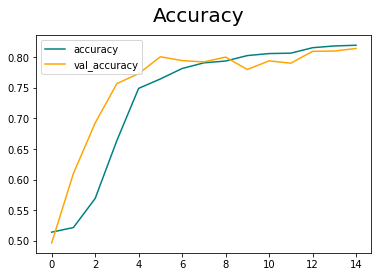

In [22]:
plot_history(hist)

In [ ]:
hist = model.fit(x_train, y_train, epochs=15, verbose=1, validation_split=0.3)

In [ ]:
plot_history(hist)

In [ ]:
hist = model.fit(x_train, y_train, epochs=15, verbose=1, validation_split=0.3)

In [ ]:
plot_history(hist)

In [ ]:
# y_test value count
np.unique(y_train, return_counts=True)

In [ ]:
hist = model.fit(x_train, y_train, epochs=5, verbose=1, validation_split=0.3)

In [ ]:
plot_history(hist)

In [ ]:
model.save("/kaggle/working/model_acc_80.h5")

# Model Prediction

In [ ]:
def predict(image, model_path= "/kaggle/working/model_acc_80.h5"):
    IMG_SHAPE = 128
    model = keras.models.load_model(model_path)
    
    # detect face in the image
    harrcascade_face_xml = "/kaggle/input/haarcascades/haarcascade_frontalface_default.xml"
    face_cascade = cv2.CascadeClassifier(harrcascade_face_xml)
    
    img_data_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_data_gray, 1.1, 4)
    
    if not len(faces):
        print("no face detected")
        return
                    
    x, y, w, h = faces[0]
    face_cropped = image[y: y+h, x: x+w]
    img_data = cv2.resize(face_cropped, (IMG_SHAPE, IMG_SHAPE))
    return np.argmax(model.predict(img_data.reshape(-1, IMG_SHAPE, IMG_SHAPE, 3)), axis=1)
    

In [ ]:
# !wget "https://www.noldus.com/static/images/core-blog/mobile/measuring-painful-faces-1583143928.jpg"

In [ ]:
image = cv2.imread("/kaggle/working/measuring-painful-faces-1583143928.jpg")
predict(image)

In [ ]:
img, label = training_data[3000]
predict(img), label

# Using Xception pretrained model

In [ ]:
from tensorflow.keras.applications import xception

In [ ]:
def Model_customized():
    conv_layer = xception.Xception(include_top=False, input_shape=(128, 128, 3))
    model = Sequential()

    model.add(conv_layer)
    
    # freezing vgg16 layers
    for layer in model.layers[:-2]:
        layer.trainable = False
    
    # building dense layer
    model.add(Flatten())
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(228, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation='softmax'))
    
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
model = Model_customized()

In [ ]:
model.summary()

In [ ]:
hist = model.fit(x_train, y_train, epochs=15, verbose=1, validation_split=0.3)

In [ ]:
plot_history(hist)

In [ ]:
hist = model.fit(x_train, y_train, epochs=15, verbose=1, validation_split=0.3)

In [ ]:
plot_history(hist)

# Data Augmentation to improve the accuracy

In [ ]:
data_generator = ImageDataGenerator(
    horizontal_flip=True
)

batch_size = 64
data_generator.fit(x_train)

train_gen = data_generator.flow(x_train, y_train, batch_size=batch_size, seed=RANDOM_STATE)
del x_train
del y_train
del training_data

In [ ]:
hist = model.fit_generator(train_gen, 
                    epochs=15,  # one forward/backward pass of training data
                    steps_per_epoch=x_train.shape[0]//batch_size,  # number of images comprising of one epoch
                    validation_data=(x_test, y_test), # Or validation_data=valid_generator
                    validation_steps=x_test.shape[0]//batch_size)

In [ ]:
plot_history(hist)

In [ ]:
hist = model.fit_generator(train_gen, 
                    epochs=15,  # one forward/backward pass of training data
                    steps_per_epoch=x_train.shape[0]//batch_size,  # number of images comprising of one epoch
                    validation_data=(x_test, y_test), # Or validation_data=valid_generator
                    validation_steps=x_test.shape[0]//batch_size)